# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'>Edge Detection

# <span style='font-family:"Times New Roman"'> Loading Required Modules:

In [1]:
from sklearn.preprocessing import Binarizer
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import feature
import numpy as np

#  <span style='font-family:"Times New Roman"'> Reading Image:

In [2]:
A = mpimg.imread('headCT.tif')
A = A/255    #Scaling to [0,1]

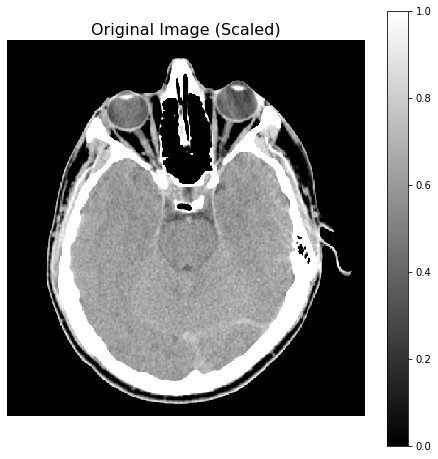

In [3]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(A,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Original Image (Scaled)', fontsize = 16)
plt.show()

# <span style='font-family:"Times New Roman"'> Smoothing Image:

In [4]:
h_ave = np.ones((5,5)) / 25
A_smoothed = ndimage.convolve(A, h_ave)

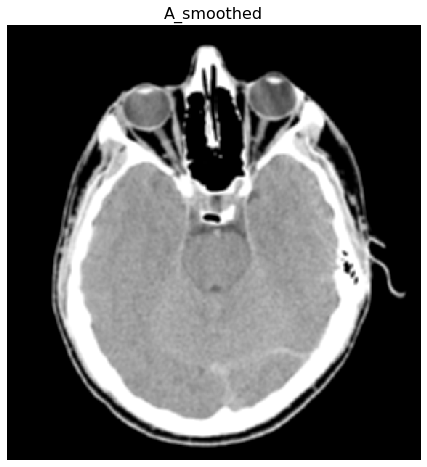

In [5]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(A_smoothed,cmap='gray')
plt.axis('off')
plt.title('A_smoothed', fontsize = 16)
plt.show()

#  <span style='font-family:"Times New Roman"'> Smoothing with Sobel Masks :

In [6]:
sobel_horiz = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
sobel_vert = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

In [7]:
gx = ndimage.convolve(A_smoothed, sobel_horiz)
gy = ndimage.convolve(A_smoothed, sobel_vert)
g = np.abs(gx) + np.abs(gy)

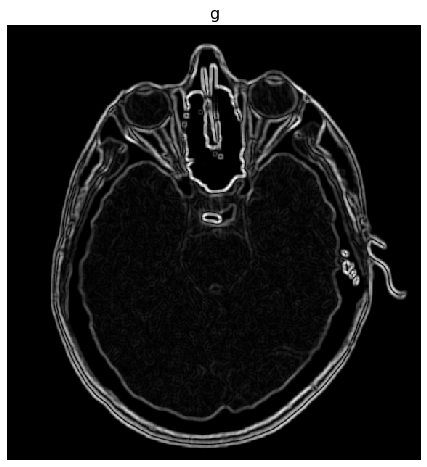

In [8]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(g,cmap='gray')
plt.axis('off')
plt.title('g', fontsize = 16)
plt.show()

# <span style='font-family:"Times New Roman"'>  Thresholding `g` at 15% of its maximum value:

In [9]:
I_trsh = Binarizer(np.max(g)*0.15)
g_thresh = I_trsh.transform(g)

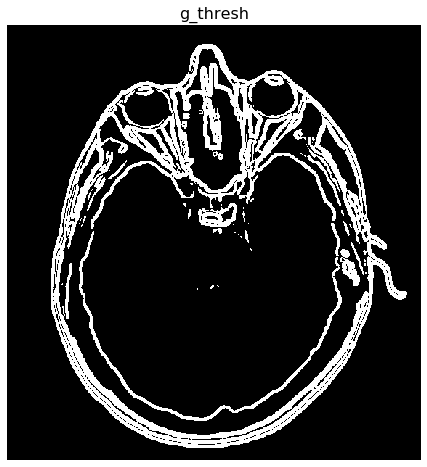

In [10]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(g_thresh,cmap='gray')
plt.axis('off')
plt.title('g_thresh', fontsize = 16)
plt.show()

#  <span style='font-family:"Times New Roman"'> Detecting edges with Canny algorithm

In [11]:
A_canny_default=feature.canny(A)

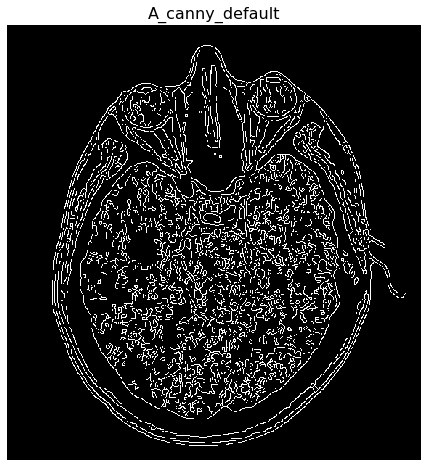

In [12]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(A_canny_default,cmap='gray')
plt.axis('off')
plt.title('A_canny_default', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'>`A_canny_default` does not match the results in Figure 10.26(d). The reason lies within default parameters of canny. Lower bound for hysteresis thresholding (linking edges) is set to `10%` and Upper bound for hysteresis thresholding is set to `20%`. Also, the sigma value is `1` in default canny. These values are different from used values in book.


# <span style='font-family:"Times New Roman"'>Detecting edges with modifying Canny algorithm features: 

In [13]:
A_canny=feature.canny(A,2,0.05,0.15)

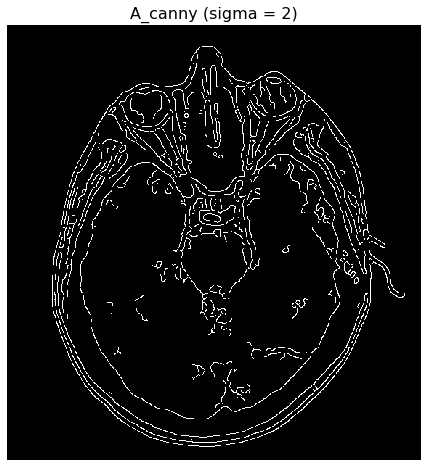

In [14]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(A_canny,cmap='gray')
plt.axis('off')
plt.title('A_canny (sigma = 2)', fontsize = 16)
plt.show()

In [15]:
A_canny=feature.canny(A,3,0.05,0.15)

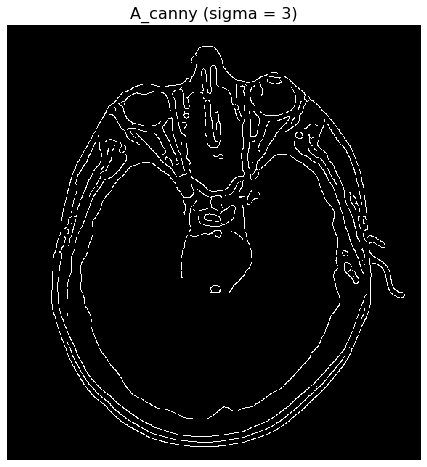

In [16]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(A_canny,cmap='gray')
plt.axis('off')
plt.title('A_canny (sigma = 3)', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'> Two different parameters for `sigma` is selected. `sigma = 3` closely replicates the result in Figure 10.26. It shows that, feature selection in canny is crucial. When sigma is set bad, plenty of lines are going to be considered as edges by mistake (sigma will affect blurring and as it increases, it blurs more). 
<span style='font-family:"Times New Roman"'> These discussions verify the importance of parameter selection in edge detection algorithms. If selected haphazardly, the results are going to be wrong.    
